# LSTM - Univariate - Model - 5 Day - Forecast - Phase - II

In [412]:
import pandas as pd
filtered_df = pd.read_csv('../../data/5day_forecast_2024.csv')

In [413]:
duplicates = filtered_df[filtered_df['date'].duplicated()]
duplicates

,date,pettah_average


In [414]:
# Keep the first occurrence and drop the rest
filtered_df = filtered_df.drop_duplicates(subset=['date'], keep='first')

## Reading Data Set Again from the Excel

In [415]:
# filtered_df = pd.read_excel('../../data/Lstm_Dates.xlsx')
# # Replace all missing values (NaN) in the 'items' column with 'Rice (Rs/kg)_Nadu 2'
# filtered_df['items'] = filtered_df['items'].fillna('Rice (Rs/kg)_Nadu 2')
# filtered_df.head(15)

# Feature Engineering and Final Data Frame Creation

## Use Interpolation to Fill Missing Values

In [416]:
# Time-based interpolation (useful for datetime indices)
filtered_df['pettah_average'] = filtered_df['pettah_average'].interpolate(method='linear', limit_direction='both')
filtered_df.head(15)

,date,pettah_average
0,5/31/2019,84.000000
1,6/1/2019,84.000000
2,6/2/2019,84.000000
3,6/3/2019,84.000000
4,6/4/2019,83.333333
5,6/5/2019,82.666667
6,6/6/2019,82.000000
7,6/7/2019,81.000000
8,6/8/2019,80.933333
9,6/9/2019,80.866667


## Regime indicator 

In [417]:
# # Ensure 'date' column is in datetime format
# filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# # Set the date column as the index (if not already)
# filtered_df.set_index('date', inplace=True)

# # Initialize the 'regime' column with default value, assuming 0 for stable period
# filtered_df['regime'] = 0

# # Assign regime indicator values based on known economic periods
# # Stable period: 2019 to the end of 2021
# filtered_df.loc[(filtered_df.index >= '2019-01-01') & (filtered_df.index < '2022-01-01'), 'regime'] = 0

# # Crisis period: 2022 to mid-2023
# filtered_df.loc[(filtered_df.index >= '2022-01-01') & (filtered_df.index < '2023-07-01'), 'regime'] = 1

# # Recovery period: mid-2023 onward
# filtered_df.loc[filtered_df.index >= '2023-07-01', 'regime'] =2

# filtered_df.head()

## Plotting the Pettah Average Price

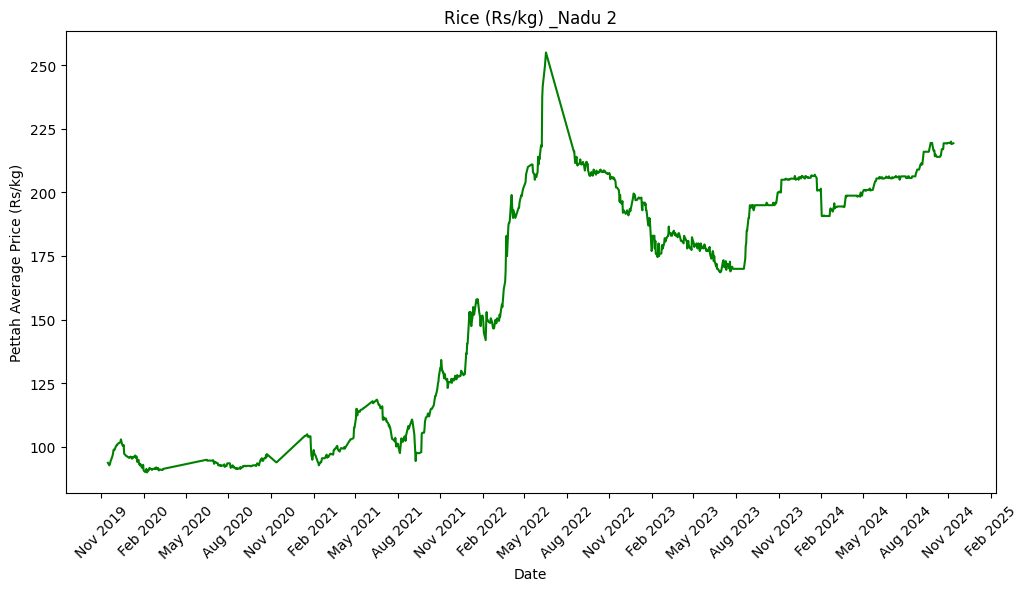

In [418]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

filtered_df['date'] = pd.to_datetime(filtered_df['date'])

latest_data = filtered_df[-1825:].reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot pettah_average over time
sns.lineplot(data=latest_data, x='date', y='pettah_average', ax=ax, color='green')

# Add titles and labels
ax.set_title('Rice (Rs/kg) _Nadu 2')
ax.set_xlabel('Date')
ax.set_ylabel('Pettah Average Price (Rs/kg)')

# Set x-axis format to show the month and year (e.g., Jan 2024)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the interval for x-axis ticks to every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# latest_data.to_csv('forecast_2024.csv', index=False)

# Show the plot
plt.show()

In [419]:
print(filtered_df.columns)

Index(['date', 'pettah_average'], dtype='object')


## Time Series Decomposition - Additive Model

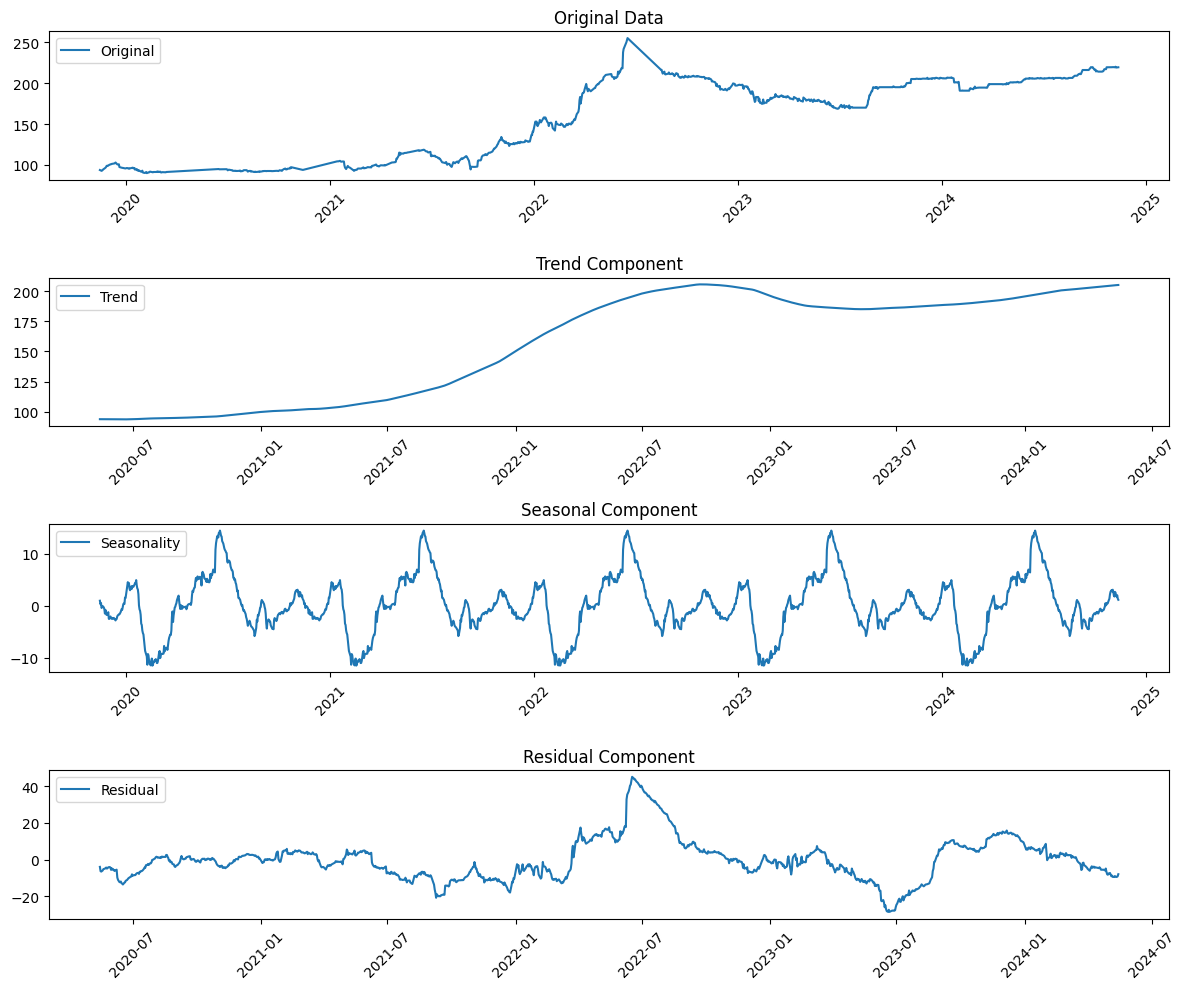

In [420]:
from statsmodels.tsa.seasonal import seasonal_decompose

filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Filter the latest 1825 data points
latest_data = filtered_df[-1825:]

# Set index to 'date' column
latest_data.set_index('date', inplace=True)

# Perform seasonal decomposition (additive model is often used for price data)
decomposition = seasonal_decompose(latest_data['pettah_average'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(latest_data['pettah_average'], label='Original')
plt.title('Original Data')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.title('Seasonal Component')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual Component')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [421]:
# import pandas as pd
# from statsmodels.tsa.seasonal import seasonal_decompose
# import matplotlib.pyplot as plt

# filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# filtered_df.set_index('date', inplace=True)

# # Perform seasonal decomposition (additive model is often used for price data)
# decomposition = seasonal_decompose(filtered_df['pettah_average'], model='additive', period=365)

# # Plot the decomposed components
# plt.figure(figsize=(10, 8))
# plt.subplot(4, 1, 1)
# plt.plot(filtered_df['pettah_average'], label='Original')
# plt.legend(loc='upper left')

# plt.subplot(4, 1, 2)
# plt.plot(decomposition.trend, label='Trend')
# plt.legend(loc='upper left')

# plt.subplot(4, 1, 3)
# plt.plot(decomposition.seasonal, label='Seasonality')
# plt.legend(loc='upper left')

# plt.subplot(4, 1, 4)
# plt.plot(decomposition.resid, label='Residual')
# plt.legend(loc='upper left')

# plt.tight_layout()
# plt.show()

## Check the Stationary

In [422]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the specific column (replace 'price_column' with your column name)
adf_result = adfuller(latest_data['pettah_average'])

# Print the results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -0.7443468313264617
p-value: 0.8349259839103078
Critical Values:
   1%: -3.433972018026501
   5%: -2.8631399192826676
   10%: -2.5676217442756872



### Non-Stationary Time Series

A time series is non-stationary if its statistical properties change over time. In other words, a non-stationary series may have:

- Trends: The mean of the series may increase or decrease over time.
- Changing Variance: The spread around the mean may increase or decrease over time.
- Seasonality: The series may show repeating patterns or cycles at regular intervals.
- Autocovariance Depends on Time: The covariance between points can change depending on the specific time period.

## Data Transformation

### Box - Cox Transform

In [423]:
from scipy.stats import boxcox

# Apply Box-Cox Transformation
latest_data['pettah_average'], lambda_value = boxcox(latest_data['pettah_average'])

# Print the lambda used for the transformation
print(f"Lambda value: {lambda_value}")

Lambda value: 0.6969696416178247


C:\Users\VenuraP\AppData\Local\Temp\ipykernel_4588\1942972102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['pettah_average'], lambda_value = boxcox(latest_data['pettah_average'])


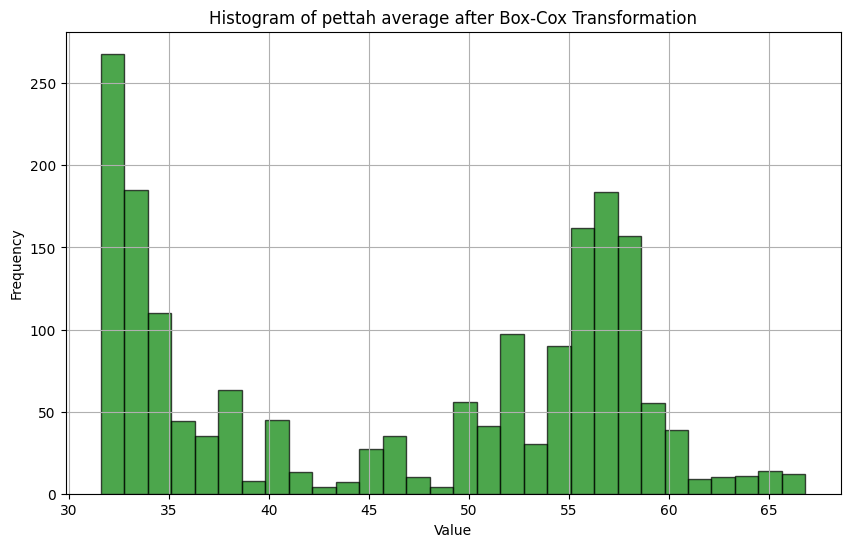

In [424]:
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.hist(latest_data['pettah_average'], bins=30, alpha=0.7, color='g', edgecolor='black')
plt.title('Histogram of pettah average after Box-Cox Transformation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True) 
plt.show()

## Data Scaling

### Min-Max Scaling

In [425]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(latest_data)

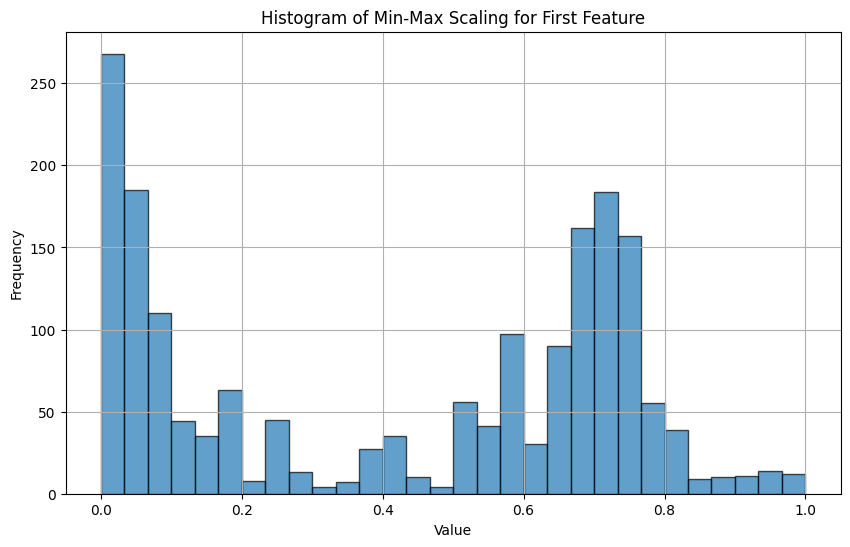

In [426]:
import matplotlib.pyplot as plt

# Plot histogram for the first feature only
plt.figure(figsize=(10, 6))
plt.hist(scaled_data[:, 0], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Min-Max Scaling for First Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Remove the Zero Values in the Scaled_df

In [427]:
# Identify rows that have any '0' values
rows_with_zeros = (scaled_data == 0).any(axis=1)

# Filter out those rows (keep only rows without '0' values)
scaled_data = scaled_data[~rows_with_zeros]

## Train / Test Split 

## 5 Day Forecast Sequence Creation

In [428]:
# import numpy as np

# # Assuming `date_df` is your original DataFrame with the date index and scaled data
# date_index = filtered_df.index  # Extract date index for tracking

# # Define sequence length and forecast horizon
# sequence_length = 30  # Number of time steps in each input sequence
# forecast_horizon = 5  # Number of days to predict
# num_features = scaled_data.shape[1]  # Total number of features

# # Create sequences, labels, and corresponding dates for each sequence
# sequences = []
# labels = []
# forecast_dates = []

# for i in range(len(scaled_data) - sequence_length - forecast_horizon + 1):
#     # Input sequence for 30 days
#     seq = scaled_data[i:i + sequence_length]
    
#     # Label (next 7 days of values)
#     label = scaled_data[i + sequence_length:i + sequence_length + forecast_horizon, 0]  # Use only the first feature for labels

#     # Corresponding dates for the forecast period
#     forecast_date_range = date_index[i + sequence_length:i + sequence_length + forecast_horizon]
    
#     # Append to lists
#     sequences.append(seq)
#     labels.append(label)
#     forecast_dates.append(forecast_date_range)

# # Convert to numpy arrays
# sequences = np.array(sequences)
# labels = np.array(labels)

# # Split into train and test sets
# train_size = int(0.8 * len(sequences))
# train_x, test_x = sequences[:train_size], sequences[train_size:]
# train_y, test_y = labels[:train_size], labels[train_size:]
# train_dates, test_dates = forecast_dates[:train_size], forecast_dates[train_size:]

# print("Train X shape:", train_x.shape)  # Expected: (samples, 30, num_features)
# print("Train Y shape:", train_y.shape)  # Expected: (samples, 7)
# print("Test X shape:", test_x.shape)
# print("Test Y shape:", test_y.shape)
# print("Example forecast dates for the first test sample:", test_dates[0])

In [429]:
scaled_data.shape

(1824, 1)

In [430]:
import numpy as np

date_index = latest_data.index

# Define sequence length and forecast horizon
sequence_length = 30
forecast_horizon = 5

# Initialize lists for sequences, labels, and corresponding dates
sequences, labels, seq_dates, label_dates = [], [], [], []

# Create sequences and labels iteratively
for i in range(len(scaled_data) - sequence_length - forecast_horizon + 1):
    # Create sequence of 30 elements
    seq = scaled_data[i:i + sequence_length]
    # Create label of the next 5 values
    label = scaled_data[i + sequence_length:i + sequence_length + forecast_horizon, 0]
    
    # Record corresponding dates
    seq_date = date_index[i:i + sequence_length]
    label_date = date_index[i + sequence_length:i + sequence_length + forecast_horizon]
    
    # Append to lists
    sequences.append(seq)
    labels.append(label)
    seq_dates.append(seq_date)
    label_dates.append(label_date)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into training and testing
train_x, test_x = sequences[:-1], sequences[-1:]
train_y, test_y = labels[:-1], labels[-1:]
train_x_dates, test_x_dates = seq_dates[:-1], seq_dates[-1]
train_y_dates, test_y_dates = label_dates[:-1], label_dates[-1]

# Debugging Outputs
print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)
print("Test Forecast Dates:", test_y_dates)

# Print the last 5 training dates for verification
print("\nLast 5 Training Dates:")
for idx, date_range in enumerate(train_x_dates[-5:]):
    print(f"Sequence {idx + 1}: {date_range[0]} to {date_range[-1]}")

Train X shape: (1789, 30, 1)
Train Y shape: (1789, 5)
Test X shape: (1, 30, 1)
Test Y shape: (1, 5)
Test Forecast Dates: DatetimeIndex(['2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10',
               '2024-11-11'],
              dtype='datetime64[ns]', name='date', freq=None)

Last 5 Training Dates:
Sequence 1: 2024-10-03 00:00:00 to 2024-11-01 00:00:00
Sequence 2: 2024-10-04 00:00:00 to 2024-11-02 00:00:00
Sequence 3: 2024-10-05 00:00:00 to 2024-11-03 00:00:00
Sequence 4: 2024-10-06 00:00:00 to 2024-11-04 00:00:00
Sequence 5: 2024-10-07 00:00:00 to 2024-11-05 00:00:00


## Adding the Attention Layer

In [431]:
# import tensorflow as tf
# from tensorflow.keras.layers import Layer
# import tensorflow.keras.backend as K

# @tf.keras.utils.register_keras_serializable()
# class Attention(Layer):
#     def __init__(self, **kwargs):
#         super(Attention, self).__init__(**kwargs)

#     def build(self, input_shape):
#         self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
#                                  initializer="normal")
#         self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
#                                  initializer="zeros")
#         super(Attention, self).build(input_shape)

#     def call(self, x):
#         e = K.tanh(K.dot(x, self.W) + self.b)
#         a = K.softmax(e, axis=1)
#         output = x * a
#         return K.sum(output, axis=1)

## Model-Conv1D and Bidirectional LSTM Layers

In [432]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Conv1D, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add a Conv1D layer as the initial layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(train_x.shape[1], train_x.shape[2])))

model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=32, return_sequences=False)))
model.add(Dropout(0.2))

# # Add the Attention layer
# model.add(Attention())

# Add a dense output layer with 5 units for 5-day forecast
model.add(Dense(units=5, activation='linear'))  

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\VenuraP\AppData\Local\anaconda3\envs\hartipredict\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [433]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)              │ (None, 28, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_39                │ (None, 28, 256)        │       197,632 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 28, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_40                │ (None, 28, 128)        │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_41                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403,781 (1.54 MB)

 Trainable params: 403,781 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

### Hyperparameter Tuning

In [434]:
# # Define callbacks
# # early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# # patience = patience=5: Number of epochs to wait for improvement in validation loss before stopping. If validation loss does not improve for 5 consecutive epochs, training will stop
model_checkpoint = ModelCheckpoint('models/Nadu_2_prediction/5 Day Model/5day_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[model_checkpoint] 
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0983 - val_loss: 0.0061
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0086 - val_loss: 0.0035
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0076 - val_loss: 5.0778e-04
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0062 - val_loss: 5.2232e-04
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0055 - val_loss: 7.1597e-04
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0047 - val_loss: 4.3503e-04
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0055 - val_loss: 0.0012
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0046 - val_loss: 0.0065
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0051 - val_loss: 4.1133e-04
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0044 - val_loss: 0.0035
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0040 - val_loss: 6.4176e-04
Epoch 12/100
23/23 ━━━━━━━━

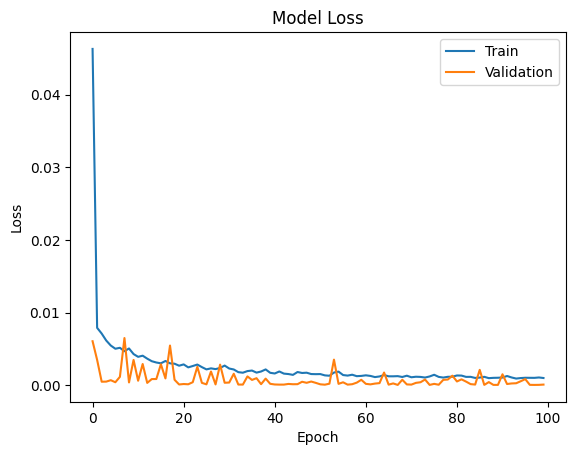

In [435]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

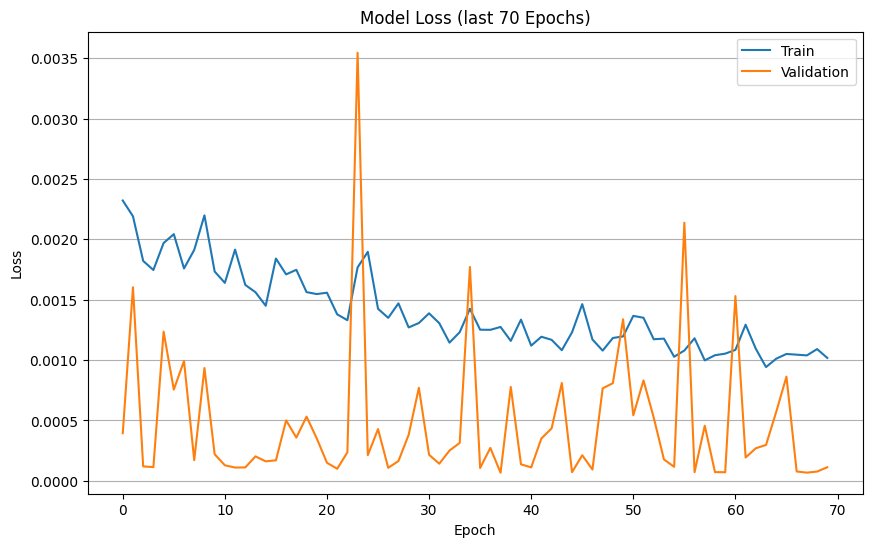

In [436]:
import matplotlib.pyplot as plt

# Get the total number of epochs
total_epochs = len(history.history['loss'])

# Define the range for the 70 epochs
last_70_epochs = range(min(70, total_epochs))

# Slice the loss and validation loss for the last 70 epochs
loss = history.history['loss'][-70:]
val_loss = history.history['val_loss'][-70:]

# Plot training & validation loss values for the last 70 epochs
plt.figure(figsize=(10, 6))
plt.plot(last_70_epochs, loss)
plt.plot(last_70_epochs, val_loss)
plt.title('Model Loss (last 70 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Add horizontal grid lines
plt.grid(axis='y')

plt.show()

## Error Analysis on Training Set 

In [437]:
# High level evaluation on test set loss Evaluate the best model on the test set
import tensorflow as tf
best_model = tf.keras.models.load_model('models/Nadu_2_prediction//5 Day Model/5day_model.keras')

In [438]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predictions_train = best_model.predict(train_x)

# Calculate evaluation metrics
r2 = r2_score(train_y, predictions_train)
mae = mean_absolute_error(train_y, predictions_train)
mse = mean_squared_error(train_y, predictions_train)
rmse = np.sqrt(mse)

print("Train R-squared:", r2)
print("Train Mean Absolute Error (MAE):", mae)
print("Train set Mean Squared Error (MSE):", mse)
print("Train set Root Mean Squared Error (RMSE):", rmse)

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
Train R-squared: 0.9976043285568856
Train Mean Absolute Error (MAE): 0.010110167222164356
Train set Mean Squared Error (MSE): 0.00022866225103308668
Train set Root Mean Squared Error (RMSE): 0.015121582292640101


## Error analysis on Test Set

In [439]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict temperatures using the trained model
predictions_test = best_model.predict(test_x)

# Calculate evaluation metrics
r2 = r2_score(test_y, predictions_test)
mae = mean_absolute_error(test_y, predictions_test)
mse = mean_squared_error(test_y, predictions_test)
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
R-squared: nan
Mean Absolute Error (MAE): 0.0018418951293160957
Mean Squared Error (MSE): 4.968434230541705e-06
Root Mean Squared Error (RMSE): 0.0022289984815027815


c:\Users\VenuraP\AppData\Local\anaconda3\envs\hartipredict\lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


- MSE is sensitive to outliers in the data when MSE is high
- RMSE also same sensitive to lager erros but this is good since the units are same as the data ( Rs and error also Rs)

## Prediction on Test Set

In [440]:
prediction = best_model.predict(test_x)  # Shape: (num_samples, timesteps=sequence_length, features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


## Inverse Transformation on Test set and Predictions ( Scalers -->Transformers-->Actual Prices)

In [441]:
from scipy.special import inv_boxcox

# Inverse transformation for test_y
true_prices = []
for row in test_y:
    # Reshape each row to the scaler's feature shape and inverse transform
    row_copies = np.repeat(row.reshape(-1, 1), test_x.shape[-1], axis=-1)
    # Apply inverse scaling and Box-Cox
    row_true_price = scaler.inverse_transform(row_copies)[:, 0]  # Keep only the first feature's original values min-max scaling
    row_true_price = inv_boxcox(row_true_price, lambda_value)    # Apply Box-Cox inverse
    true_prices.append(row_true_price)

# Convert list back to a numpy array
true_prices = np.array(true_prices)

# Inverse transformation for predictions
predicted_prices = []
for row in prediction:
    # Reshape each row to match the scaler's shape and inverse transform
    row_copies = np.repeat(row.reshape(-1, 1), test_x.shape[-1], axis=-1)
    # Apply inverse scaling and Box-Cox
    row_predicted_price = scaler.inverse_transform(row_copies)[:, 0] # Keep only the first feature's original values min-max scaling
    row_predicted_price = inv_boxcox(row_predicted_price, lambda_value) # Apply Box-Cox inverse
    predicted_prices.append(row_predicted_price)

# Convert list back to a numpy array
predicted_prices = np.array(predicted_prices)

DatetimeIndex(['2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10',
               '2024-11-11'],
              dtype='datetime64[ns]', name='date', freq=None)
[219.     219.0825 219.165  219.2475 219.33  ]
[218.93954 218.92386 219.57727 218.53387 219.01428]
Forecast Dates: DatetimeIndex(['2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10',
               '2024-11-11'],
              dtype='datetime64[ns]', name='date', freq=None)
True Prices: [219.     219.0825 219.165  219.2475 219.33  ]
Predicted Prices: [218.93954 218.92386 219.57727 218.53387 219.01428]
Shapes - Forecast Dates: 5 True Prices: (5,) Predicted Prices: (5,)


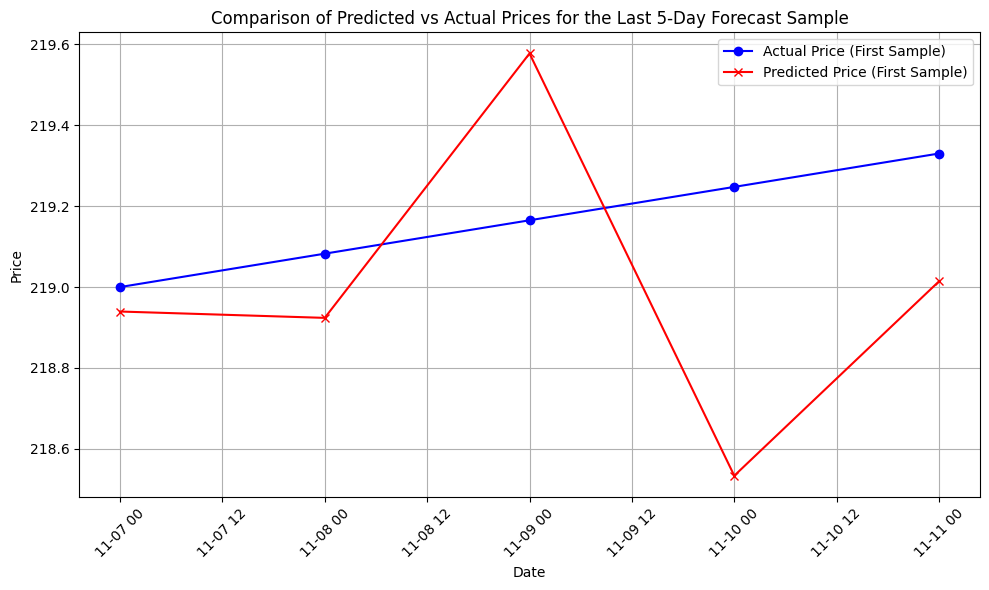

In [442]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the first and only forecast period from `test_y` and `test_dates`
forecast_dates = test_y_dates  # Already contains the last 5 dates
sample_true = true_prices[0]  # Extract the single 5-day true price values
sample_pred = predicted_prices[0]  # Extract the single 5-day predicted values

print(forecast_dates)
print(sample_true)
print(sample_pred)

# Ensure forecast_dates is in a compatible format
if isinstance(forecast_dates, (np.ndarray, pd.Series)):
    forecast_dates = forecast_dates.tolist()

# Debugging: Print dimensions and content
print("Forecast Dates:", forecast_dates)
print("True Prices:", sample_true)
print("Predicted Prices:", sample_pred)
print("Shapes - Forecast Dates:", len(forecast_dates),
      "True Prices:", sample_true.shape,
      "Predicted Prices:", sample_pred.shape)

# Check dimensions for consistency
if len(forecast_dates) != len(sample_true) or len(forecast_dates) != len(sample_pred):
    raise ValueError(
        f"Mismatch in dimensions: forecast_dates ({len(forecast_dates)}) vs "
        f"true prices ({len(sample_true)}) or predicted prices ({len(sample_pred)})"
    )

# Plotting
plt.figure(figsize=(10, 6))

# Plot true and predicted prices
plt.plot(forecast_dates, sample_true, label='Actual Price (First Sample)', marker='o', color='blue')
plt.plot(forecast_dates, sample_pred, label='Predicted Price (First Sample)', marker='x', color='red')

# Add labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Comparison of Predicted vs Actual Prices for the Last 5-Day Forecast Sample")
plt.legend()
plt.grid(True)

# Rotate dates on x-axis for readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##  Heatmap of Prediction Errors

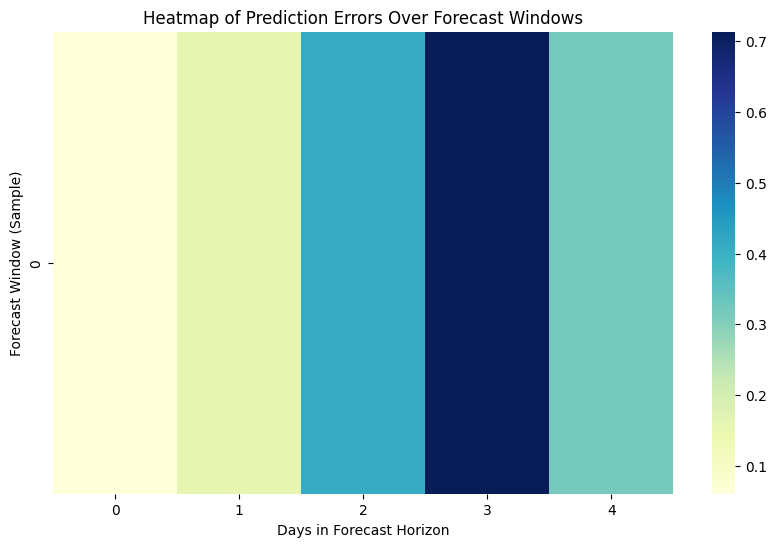

In [443]:
import seaborn as sns
import numpy as np

# Calculate error matrix
errors = np.abs(true_prices - predicted_prices)  # Absolute error for each day in the forecast

plt.figure(figsize=(10, 6))
sns.heatmap(errors, cmap="YlGnBu", annot=False)
plt.xlabel("Days in Forecast Horizon")
plt.ylabel("Forecast Window (Sample)")
plt.title("Heatmap of Prediction Errors Over Forecast Windows")
plt.show()


## Scatter Plot of Predicted vs Actual Values

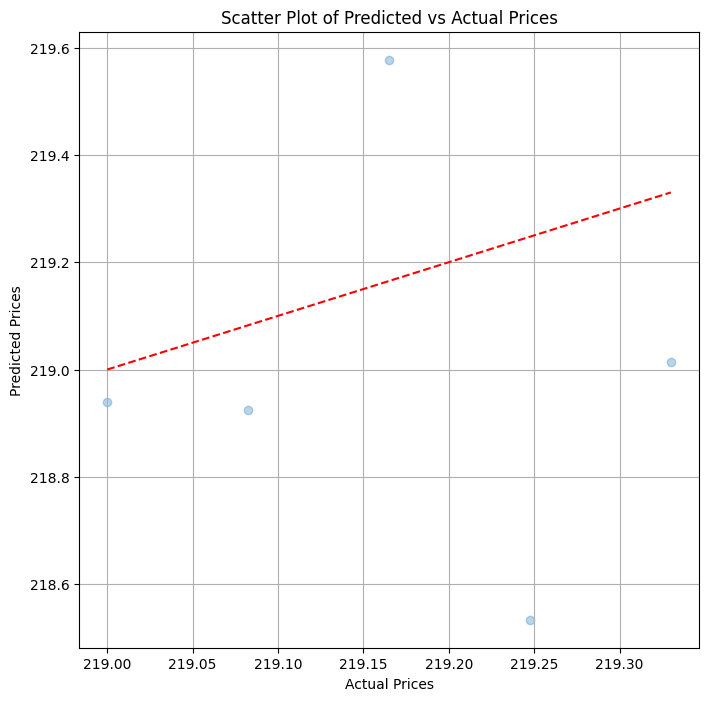

In [444]:
plt.figure(figsize=(8, 8))
plt.scatter(true_prices.flatten(), predicted_prices.flatten(), alpha=0.3)
plt.plot([min(true_prices.flatten()), max(true_prices.flatten())], [min(true_prices.flatten()), max(true_prices.flatten())], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Scatter Plot of Predicted vs Actual Prices")
plt.grid(True)
plt.show()


##  Mean Absolute Error (MAE) or Mean Squared Error (MSE) Over Time

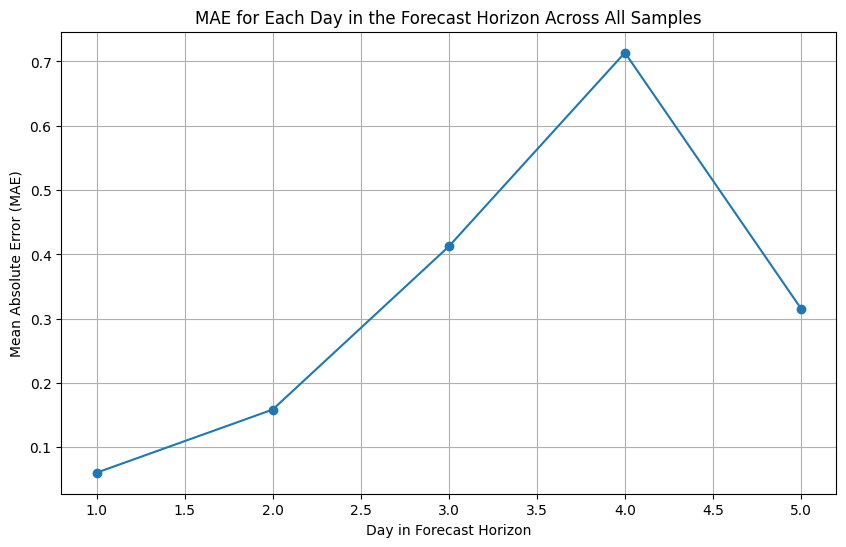

In [445]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for each day in the 5-day forecast window across all samples
mae_per_day = [mean_absolute_error(true_prices[:, i], predicted_prices[:, i]) for i in range(5)]

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), mae_per_day, marker='o')
plt.xlabel("Day in Forecast Horizon")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("MAE for Each Day in the Forecast Horizon Across All Samples")
plt.grid(True)
plt.show()
